# Extracción manual de características
Se desea comparar precios de productos específicos entre tiendas. Las características del conjunto de datos pre-cargado sales_df son: storeID, product, quantity y revenue. Las características quantity y  revenue indican cuántos artículos de un producto en particular se vendieron en una tienda y cuáles fueron los ingresos totales. Para el propósito de su análisis, es más interesante saber el precio promedio por producto.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sales_df=pd.read_csv("lab4-1.csv")#reading a dataset in a dataframe using pandas
print("sales_df",sales_df.shape)

sales_df (78, 4)


In [2]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']
print("sales_df",sales_df.shape)

sales_df (78, 5)


Descarte las características cantidad vendida (quantity) y ingresos totales (revenue) del conjunto de datos.

In [3]:
# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity','revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


¡Buen trabajo! Analizando bien el conjunto de datos, compruebe siempre si puede calcular características relevantes y descartar  irrelevantes.

# Extracción manual de características II
Estás trabajando en una variante del conjunto de datos ANSUR height_df, donde la altura de una persona se midió 3 veces. Agregue una característica con la altura media al conjunto de datos y luego suelte las 3 características originales.

In [4]:
height_df=pd.read_csv("Lab4-2.csv")#reading a dataset in a dataframe using pandas
print("sales_df",height_df.shape)
print("sales_df",height_df.head(5))

sales_df (100, 4)
sales_df    weight_kg  height_1  height_2  height_3
0       81.5      1.78      1.80      1.80
1       72.6      1.70      1.70      1.69
2       92.9      1.74      1.75      1.73
3       79.4      1.66      1.68      1.67
4       94.6      1.91      1.93      1.90


Agregue una característica con la altura media al conjunto de datos. Usa el .mean()método con axis=1.

In [5]:
# Calculate the mean height
height_df['height'] = height_df[['height_1','height_2','height_3']].mean(axis=1)

Descarte las 3 características de altura originales del conjunto de datos.

In [6]:
# Drop the 3 original height features
reduced_df = height_df.drop(['height_1','height_2','height_3'], axis=1)
print("reduced_df",reduced_df.shape)
print("reduced_df",reduced_df.head(5))

reduced_df (100, 2)
reduced_df    weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


¡Excelente! Has calculado una nueva característica que es fácil de entender en comparación con, por ejemplo, los componentes principales.

# Cálculo de Componentes Principales (PCA)
Inspeccionará visualmente una muestra de 4 características del conjunto de datos ANSUR antes y después de aplicar  PCA usando Seaborn's pairplot(). Esto le permitirá inspeccionar las correlaciones por pares entre las características.

Los datos han sido precargados para usted como ansur_df

In [7]:
ansur_df=pd.read_csv("Ansur_PCA_1.csv")#reading a dataset in a dataframe using pandas
print("ansur_df",ansur_df.shape)
print("ansur_df",ansur_df.head(5))

ansur_df (250, 4)
ansur_df    Height m  Buttock Height  Waist Circumference  Shoulder Circumference
0     1.776             882                  933                    1151
1     1.702             870                  870                    1119
2     1.735             901                  964                    1276
3     1.655             821                  857                    1155
4     1.914            1080                  868                    1231


Crea un pairplot de Seaborn para inspeccionar ansur_df.

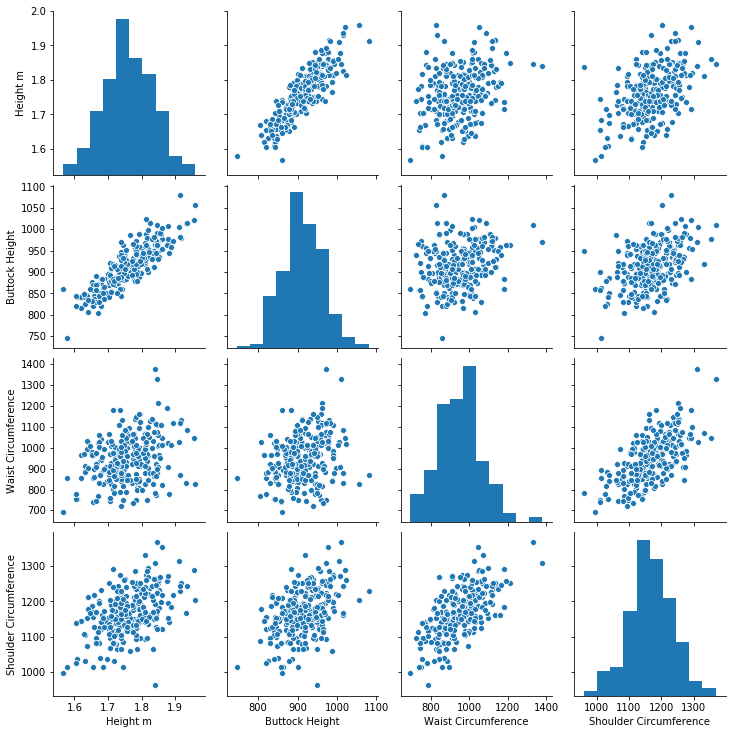

In [8]:
# Create a pairplot to inspect ansur_df
import seaborn as sns
sns.pairplot(data=ansur_df)
plt.show()

Crear un mecanismo de escalamiento y estandarizar los datos

In [9]:
from sklearn.preprocessing import StandardScaler
# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)
print(ansur_std[1:5,:])

[[-0.81251608 -0.85678398 -0.73037093 -0.73748358]
 [-0.35486211 -0.23979124  0.11722003  1.5991511 ]
 [-1.46432627 -1.83203057 -0.84759096 -0.20169473]
 [ 2.12756395  3.32284425 -0.74840478  0.92941505]]


Creamos una instancia PCA() y ajustamos y transformamos los datos estandarizados

In [10]:
from sklearn.decomposition import PCA
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_df)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
print(pc_df.head(5))

         PC 1        PC 2       PC 3      PC 4
0  -28.187777  -24.984253 -13.314828 -0.054136
1  -99.837974  -26.759245 -13.632910  0.001191
2   56.553668   48.426291 -79.472035  0.017513
3 -102.907574  -35.497168 -75.116471 -0.008868
4  -22.021371  187.971244  53.325558  0.045540


Creamos un pairplot para graficar el dataframe de componentes principales

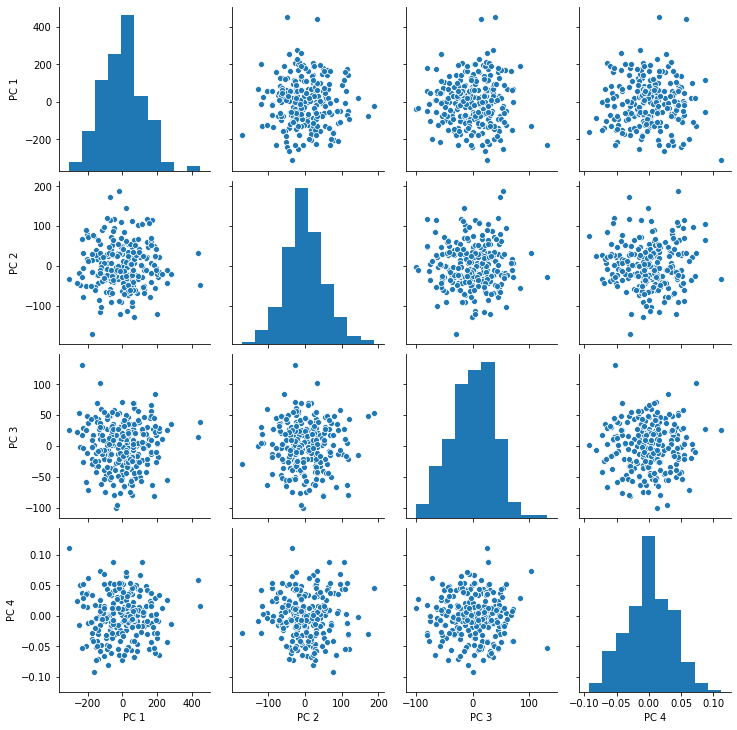

In [11]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

¡Buen trabajo! Observe cómo, en contraste con las características de entrada, ninguno de los componentes principales está correlacionado entre sí.

# PCA en un conjunto de datos más grande
Ahora aplicará PCA en una muestra de datos ANSUR algo más grande con 13 dimensiones, una vez más precargada como ansur_df. El modelo ajustado se usará en el próximo ejercicio. Dado que no estamos utilizando los componentes principales en sí mismos, no es necesario transformar los datos, en cambio, es suficiente para adaptarse pcaa los datos.

In [12]:
ansur_df=pd.read_csv("Ansur_PCA_larger.csv")#reading a dataset in a dataframe using pandas
print("ansur_df",ansur_df.shape)
print("ansur_df",ansur_df.head(5))

ansur_df (250, 13)
ansur_df    stature_m  buttockheight  waistdepth  span  waistcircumference  \
0      1.776            882         240  1782                 933   
1      1.702            870         225  1745                 870   
2      1.735            901         255  1867                 964   
3      1.655            821         205  1708                 857   
4      1.914           1080         214  2035                 868   

   shouldercircumference  footlength  handlength  functionalleglength  \
0                   1151         273         193                 1136   
1                   1119         263         195                 1096   
2                   1276         270         203                 1115   
3                   1155         267         194                 1034   
4                   1231         305         218                 1279   

   chestheight  chestcircumference  cervicaleheight  sittingheight  
0         1292                1074             15

Crea el scaler.
Estandarizar los datos.
Crea la instancia  PCA().
Ajústelo a los datos estandarizados.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit_transform(ansur_std)

array([[ 0.28636306, -0.02136634, -0.33268214, ...,  0.01424487,
        -0.46128494, -0.0553642 ],
       [ 2.49300993, -0.27860628,  0.70001836, ..., -0.02388682,
        -0.30954677, -0.01484231],
       [-0.4616525 ,  1.02462219,  1.07789043, ...,  0.06030388,
         0.0346063 ,  0.04575408],
       ...,
       [ 3.14598747,  1.14321791,  1.22737748, ..., -0.19656203,
         0.02196933,  0.17106403],
       [ 0.44205028,  0.63754284,  0.69247382, ...,  0.03393926,
        -0.10971228,  0.02323828],
       [ 6.67398755, -0.96147047,  0.15938622, ..., -0.09780937,
         0.38835271, -0.10138096]])

¡Excelente! Ha ajustadp PCA en nuestra muestra de datos de 13 dimensiones. Ahora veamos cómo los componentes explican la varianza.

# PCA explica la varianza
Inspeccionará la varianza explicada por los diferentes componentes principales de la instancia pca() que creó en el ejercicio anterior.

Imprima la razón de varianza por componente principal

In [14]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759
 0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617
 0.00065268]


Pregunta
¿Qué parte de la varianza se explica por el cuarto componente principal?<br>
    Respuestas posibles:<br>
    • Alrededor de 3.03%<br>
    • Alrededor de 3.77%<br>
    • Alrededor de 6.8%<br>
    • Sobre 61.45%

Imprima la suma acumulativa de la razón de varianza explicada.

In [15]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054
 0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732
 1.        ]


¿Cuál es el número más bajo de componentes principales que debe mantener si no desea perder más del 10% de la varianza explicada durante la reducción de dimensionalidad?.

# Comprendiendo los componentes
Ahora se aplicará PCA a las características numéricas del conjunto de datos de Pokemon poke_df, utilizando un pipe line para combinar la escala de características y PCA en un sólo comando. Luego interpretará los significados de los dos primeros componentes.

Todos los paquetes y las clases pertinentes han sido pre-cargado para usted ( Pipeline(), StandardScaler(), PCA()).

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
poke_df=pd.read_csv("Pokemon-6dim.csv")#reading a dataset in a dataframe using pandas
print("poke_df",poke_df.shape)
print("poke_df",poke_df.head(5))


poke_df (800, 6)
poke_df    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
3  80     100      123      122      120     80
4  39      52       43       60       50     65


Construya el pipeline con la función de escalamiento y una instancia PCA, establezca el número de componentes para calcular en 2.

In [17]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA())])


Ajuste el pipeline al dataset y extraiga los vectores componentes

In [18]:
# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


Pregunta:<br>
Inspeccione el PC 1. Cual de los siguientes es verdadero:<br>
    A. La velocidad de ataque (Attack Speed) tiene el mayor efecto en esta característica con diferencia. La PC 1 se puede interpretar como una medida de qué tan rápido puede atacar un Pokémon.<br>
    B. Todas las características tienen un efecto positivo similar. La PC 1 puede interpretarse como una medida de la calidad general (estadísticas altas).

Pregunta:<br>
Inspeccione el PC 2. Cual de los siguientes es verdadero:<br>
    A. La defensa (Defense) tiene un fuerte efecto positivo en el segundo componente y la veloscidad (speed) una influencia  fuerte negativa. Este componente cuantifica un equilibrio entre agilidad vs. armadura y protección (agility vs. armor & protection).<br>
    B. Todas las funciones relacionadas con la velocidad tienen un efecto negativo en este componente. Los Pokémon rápidos tienen valores altos para este componente.


¡Bien hecho! Has utilizado el pipeline por primera vez y entiendes cómo se relacionan las características con los componentes.

# PCA para la exploración de características
Ahora Utilizará el pipeline  de PCA que ha creado en el ejercicio anterior para explorar visualmente cómo algunas características categóricas se relacionan con la variación poke_df. Estas características categóricas ( Type& Legendary) se pueden encontrar en un marco de datos separado poke_cat_df.

Todos los paquetes y las clases pertinentes han sido pre-cargado para usted ( Pipeline(), StandardScaler(), PCA())

In [19]:
poke_cat_df=pd.read_csv("Pokemon_cat800.csv")#reading a dataset in a dataframe using pandas
print("poke_df",poke_cat_df.shape)
print("poke_df",poke_cat_df.head(5))

poke_df (800, 2)
poke_df     Type  Legendary
0  Grass      False
1  Grass      False
2  Grass      False
3  Grass      False
4   Fire      False


Ajuste y transforme el pipeline poke_df para extraer los componentes principales.

In [20]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


Agregue los 2 componentes a poke_cat_df

In [21]:
# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:,:1]
poke_cat_df['PC 2'] = pc[:,1:]

Use la función Tipo para colorear el diagrama de dispersión PC 1 vs PC 2.

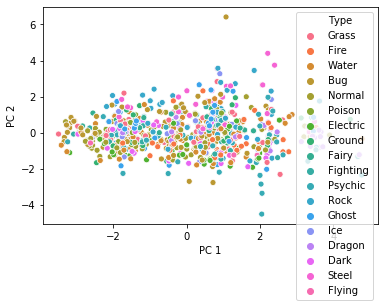

In [22]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

Utilice la caracyteristica "legendary" para colorear el diagrama de dispersión PC 1 vs PC 2.

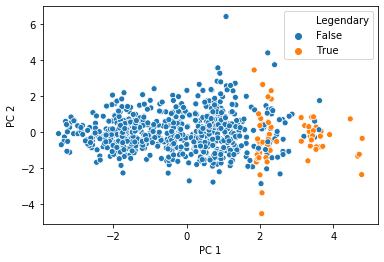

In [23]:
# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

¡Increíble! Parece que los diferentes tipos están dispersos por todo el lugar, mientras que los pokemon "Legendary" siempre obtienen puntajes altos para el PC 1, lo que significa que tienen estadísticas altas en general. Su propagación a lo largo del eje PC 2 nos dice que no son consistentemente rápidos y vulnerables o lentos y blindados.

# PCA en un modelo Pipeline
Acabamos de ver que los Pokémon legendarios tienden a tener estadísticas más altas en general. Veamos si podemos agregar un clasificador a nuestro Pipeline que detecte Pokémon legendarios versus no legendarios en función de los componentes principales.

Los datos han sido pre-cargado para usted y dividido en conjuntos de datos de entrenamiento y prueba: X_train, X_test, y_train, y_test

In [24]:
from sklearn.model_selection import train_test_split
X=pd.read_csv("Pokemon-6dim.csv")#reading a dataset in a dataframe using pandas
y=pd.read_csv("Pokemon-6dimY.csv")#reading a dataset in a dataframe using pandas
y=y['yValue']
print("X",X.shape)
print("y",y.shape)
# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X (800, 6)
y (800,)


Agregue un escalador, PCA limitado a 2 componentes y un clasificador de bosque aleatorio con random_state=0 al pipeline.

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

Ajuste el pipeline a los datos de entrenamiento. E imprima la relación de varianza explicada. 

In [33]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)


[0.44252174 0.18514786]


Evalúe la precisión en el conjunto de pruebas, e imprima la precisión del modelo.

In [34]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

94.2% test set accuracy


Repita el proceso , pero esta vez con 3 componentes PCA

In [36]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.44252174 0.18514786 0.13531327]
95.0% test set accuracy


¡Excelente! Parece que agregar el tercer componente no aumenta la precisión del modelo, aunque agrega información al conjunto de datos.

# Seleccionar la proporción de varianza a mantener

Ahorá usted dejará que PCA determine la cantidad de componentes a calcular en función de un umbral de varianza explicado que usted decida.

Trabajará en el conjunto de datos numéricos ANSUR hembra precargado como ansur_df.

Todos los paquetes y las clases pertinentes han sido pre-cargado también ( Pipeline(), StandardScaler(), PCA()).

In [37]:
ansur_df=pd.read_csv("ANSUR_II_FEMALE.csv")#reading a dataset in a dataframe using pandas
#Create a mask with the columns that we are going to keep
mask=['abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbreadth',
 'headcircumference',
 'headlength',
 'heelanklecircumference',
 'heelbreadth',
 'hipbreadth',
 'hipbreadthsitting',
 'iliocristaleheight',
 'interpupillarybreadth',
 'interscyei',
 'interscyeii',
 'kneeheightmidpatella',
 'kneeheightsitting',
 'lateralfemoralepicondyleheight',
 'lateralmalleolusheight',
 'lowerthighcircumference',
 'mentonsellionlength',
 'neckcircumference',
 'neckcircumferencebase',
 'overheadfingertipreachsitting',
 'palmlength',
 'poplitealheight',
 'radialestylionlength',
 'shouldercircumference',
 'shoulderelbowlength',
 'shoulderlength',
 'sittingheight',
 'sleevelengthspinewrist',
 'sleeveoutseam',
 'span',
 'suprasternaleheight',
 'tenthribheight',
 'thighcircumference',
 'thighclearance',
 'thumbtipreach',
 'tibialheight',
 'tragiontopofhead',
 'trochanterionheight',
 'verticaltrunkcircumferenceusa',
 'waistbacklength',
 'waistbreadth',
 'waistcircumference',
 'waistdepth',
 'waistfrontlengthsitting',
 'waistheightomphalion',
 'wristcircumference',
 'wristheight',
 'weight_kg',
 'stature_m',
 'BMI']
#Select the columns described in mask
ansur_df=ansur_df.loc[:, mask]
#Show the final dimensions of the ansur_df dataset
print(ansur_df.shape)

(1986, 94)


Involucre en el Pipeline un escalar a PCA seleccionado 80% de la varianza

In [39]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

Ajuste el Pipe a la data

In [40]:
# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

11 components selected


Incremente la proporción de varianza al 90%

In [41]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

23 components selected


Pregunta<br>
¿Cuántas características adicionales necesita para explicar el 90% en lugar del 80% de la varianza?

¡Buen trabajo! Necesitamos más del doble de los componentes para pasar del 80% al 90% de la varianza explicada.

# Seleccionando el número de componentes

Ahora tomará una decisión más informada sobre el número de componentes principales para reducir sus datos. Usando  la técnica de "codo en la gráfica". Una última vez, trabajará en el conjunto de datos numérico ANSUR femenino, que ha sido  precargado como ansur_df.

Todos los paquetes y las clases pertinentes han sido pre-cargadas para usted ( Pipeline(), StandardScaler(), PCA()).

Cree un pipeline con un escalar y un PCA seleccionando 10 componentes

In [42]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

Ajuste el pipeline a la data

In [43]:
# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

Grafique la razón de varianza explicada.

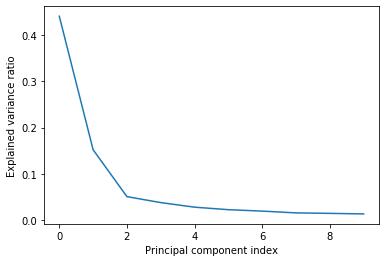

In [44]:
# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

Pregunta<br>
¿A cuántos componentes puede reducir el conjunto de datos sin comprometer demasiado la varianza explicada?<br>
(Tenga en cuenta que el eje x está indexado a cero)<br>
Respuestas posibles<br>
1<br>
2<br>
3<br>
4<br> 

¡Correcto! El 'codo' en la gráfica está en 3 componentes (el tercer componente tiene índice 2

# PCA para la compresión de imágenes

Ahora comprimirá el tamaño de 16 imágenes de dígitos escritos a mano (conjunto de datos MNIST) utilizando PCA.

Las muestras son imágenes en escala de grises de 28 X 28 píxeles que se han aplanado en matrices con 784 elementos cada una (28 x 28 = 784) y se agregaron a la matriz numpy 2D X_test. Cada uno de los 784 píxeles tiene un valor entre 0 y 255 y puede considerarse como una característica.

Un pipeline con un escalador y un modelo PCA para seleccionar 78 componentes se ha cargado previamente para usted como pipe. Este pipeline ya se ha ajustado a todo el conjunto de datos MNIST, excepto las 16 muestras en X_test.

Finalmente, se define la función plot_digits que permitirá dibujar las 16 imágenes en una cuadrícula.

In [45]:
X_test=pd.read_csv("MNISTtest.csv")#reading a dataset in a dataframe using pandas
X_train=pd.read_csv("X_trainMNIST.csv")#reading a dataset in a dataframe using pandas
X_test = X_test.to_numpy()
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=78))])
# Fit the pipe to the data
pipe.fit(X_train)
pipe

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=78,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [49]:
import matplotlib
def plot_digits(instances, images_per_row=4, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

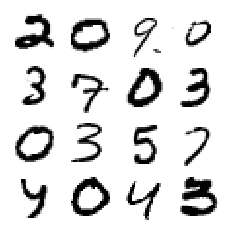

In [58]:
# Plot the MNIST sample data
plot_digits(X_test)

Transforme los datos de entrada a componentes principales utilizando el pipeline.

In [59]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

X_test has 784 features
pc has 78 features


Inverta y transforme los componentes de nuevo al espacio de características original.

In [60]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

X_rebuilt has 784 features


Grafique los datos reconstruidos

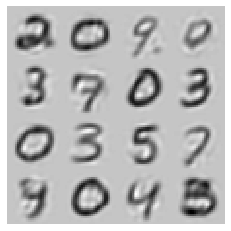

In [61]:
# Plot the reconstructed data
plot_digits(X_rebuilt)

¡Asombroso! Redujo 10 veces el tamaño de los datos, pero pudo reconstruir imágenes con una calidad razonable.